### Computational Guided Inquiry for PChem (Neshyba & Guasco)

# Probability Densities

## Mathematical formulation

A probability density function describes the relative likelihood of a continuous random variable having a given value. For example, we can use the Boltzmann density function, $f_B$, to describe the x, y, or z-component of the velocity ($v_x$, $v_y$, or $v_z$). In addition to a velocity component, this function also depends on the temperature (*T*) and the molar mass of the molecule (*M*); we say it is *parameterized* by these quantitites.  The Boltzmann density function can be written as

$$
f_B(v_x) = N_Be^{-{ ( {\frac{M}{2RT}}} ) {v_x^2}} \ \ \ \   (1)  
$$

where we have written it as a function of the x-direction velocity component, $v_x$ (the y- and z-forms look very similar). The quantity $N_B$ is a normalization constant,

$$
N_B = {\big( {\frac{M}{2 \pi RT}} \big)}^{1/2}  \ \ \ \ (2)
$$

Similarly, the Maxwell density function is written

$$
f_M(v) = N_Mv^2e^{-{( \frac{M}{2RT}} ) {v^2}} \ \ \ \ (3)
$$

with a normalization constant of

$$
N_M = 4 \pi \big( {{\frac{M}{2 \pi RT}} \big)}^{3/2} \ \ \ \ (4) 
$$

For a given molar mass, we can think of these functions as surfaces in two dimensions, (1) the velocity component or speed and (2) the temperature. A shorthand for these surfaces would be $f_B(v_x,T)$ or $f_M(v,T)$.  What do such surfaces look like?  One is shown in the figure below.  Such figures are useful for developing an intuition about how molecules move; for example, it is evident from the figure that molecules exhibit a broader distribution of velocities at higher temperature.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/fbsurface.png" height="700" width="700"/>  

<p style='text-align: center;'>
<strong>Figure 1</strong>. Probability density as a function of velocity and temperature.
    
## Units
As it turns out, the dimensions of $f_B$ and $f_M$ are the same: it's the inverse of speed. There's a reason for that, that we'll get to later. For now we'll just note that it'll be convenient to use SI for the calculations here, which means the units of $f_B$ and $f_M$ will be $s/m$. As you'll see below, we'll be doing some conversions on occasion to make sure this is the case.

## Learning Goals
1. Explain the difference between a velocity component ($v_x$, $v_y$, or $v_z$) and a speed ($v$), including the physically possible ranges of each.
1. Explain which probability density ($f_B$ or $f_M$) is appropriate for which. 
1. Calculate $f_B(v_x)$ and $f_M(v)$.
1. Sketch $f_B(v_x)$ and $f_M(v)$, including how they change at higher temperatures. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pint
from pint import UnitRegistry
ureg = UnitRegistry()
AssignQuantity = ureg.Quantity
import PchemLibrary as PL

In [2]:
%matplotlib notebook

### Using AssignQuantity
The cell below shows how to use the AssignQuantity function of UnitRegistry.

In [3]:
# Moles 
n = AssignQuantity(1,"mol")
print(n)

# Gas constant
R = AssignQuantity(8.314, "J/(mol K)")
print(R)

# Mass in g/mol (converting to SI)
M = AssignQuantity(28,'g/mol')
M.ito_base_units()
print(M)

1 mole
8.314 joule / kelvin / mole
0.028 kilogram / mole


### Calculating $f_B(T, v_x)$

To calculate the Boltzmann probability density, we have to specify some parameters. We do this in the two cells below. 

- The first cell specifies some parameters that we might want to change later. The units are all SI.
- The second cell below calculates $f_B(v_x,T)$ for these parameters.

In [4]:
# Assign the temperture and the velocity component


# Temperature
T = AssignQuantity(298, "K")
print(T)

# Velocity component in the x-direction
vx = AssignQuantity(500,"m/s")
print(vx)

298 kelvin
500 meter / second


In [5]:
# Calculate D, NB, and fB


# Here's the exponential D-factor
D = M/(2*R*T)
print(D)

# Here's the normalization constant
NB = np.sqrt(M/(2*np.pi*R*T))
print(NB)

# Now the Boltzmann function
fB = NB * np.exp(-D*vx**2)
print(fB)

# This converts fB into seconds/meter (should be numerically equal to base units)
fB.ito("s/m")
print(fB)

5.6506935015410245e-06 kilogram / joule
0.0013411456316653346 kilogram ** 0.5 / joule ** 0.5
0.0003265575188853833 kilogram ** 0.5 / joule ** 0.5
0.0003265575188853832 second / meter


### Your turn
OK, do the same for $f_M(T,v)$. Differences will be: 

- Instead of a velocity component, we need a speed ("v") of $500 \ {m\over s}$. Do this using AssignQuantity.
- There's a different normalization constant (see the introduction)
- As with fB, convert fM to seconds/meter 

In [6]:
# Assign the temperature and the speed

### BEGIN SOLUTION
# Temperature
T = AssignQuantity(298, "K")
print(T)

# Speed in the x-direction
v = AssignQuantity(500,"m/s")
print(v)

### END SOLUTION

298 kelvin
500 meter / second


In [7]:
# Calculate D, NM, and fM

### BEGIN SOLUTION
D = M/(2*R*T)
NM = 2**.5*M**(3/2)*R**(-3/2)*T**(-3/2)*np.pi**(-0.5)
fM= NM*v**2*np.exp(-D*v**2)
print(fM)
fM.ito("s/m")
print(fM)
### END SOLUTION

0.0018452764498449957 kilogram ** 1.5 * meter ** 2 / joule ** 1.5 / second ** 2
0.0018452764498449957 second / meter


### Visualizing $f_B(T,v_x)$
Our next objective is to get Python to display the probability density function $f_B(T,v_x)$. The two cells below do this. 

Also, we've tried to keep the variable names as simple as possible, but just just to be clear, the variables T, vx, D, NB, and fB are all *grids* (2-dimensional arrays).

In [8]:
# Assign the temperture and the velocity component as "state space" grids

# Making the grids
T,vx = PL.Statespace([50,500,40],[-2000,2000,60])

# Attaching units
T = AssignQuantity(T,"K")
vx = AssignQuantity(vx,"m/s")

shape of fB= (40, 60)


<IPython.core.display.Javascript object>


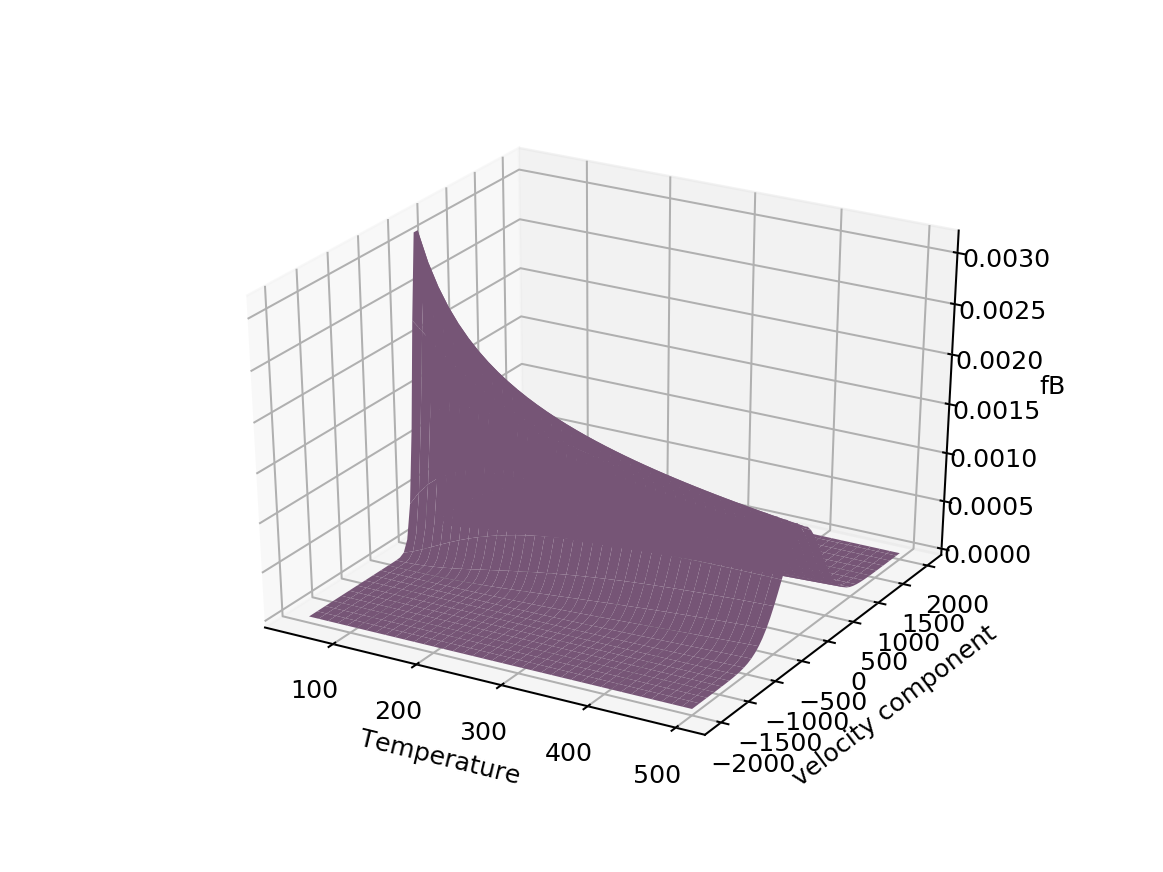

/usr/local/lib/python3.6/dist-packages/numpy/lib/stride_tricks.py:257: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


Text(0.5, 0, 'fB')

In [9]:
# Calculate D, NB, and fB -- and plot fB


# Calculate grids of "D" and the normalization constant
D = M/(2*R*T)
NB = np.sqrt(M/(2*np.pi*R*T))

# Get the probability density for every point on the grid
fB = NB * np.exp(-D*vx**2)
print("shape of fB=",np.shape(fB))

# Open up a 3d figure window
ax = plt.figure().gca(projection='3d') # Set up a 3d window 

# Prepping the axis labels
xlabel = "Temperature"
ylabel = "velocity component"
zlabel = "fB"

# Graph the probability density
ax.plot_surface(T, vx, fB, color='plum') # Make the mesh plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### Your turn
Now do something similar, but for $f_M(v)$. There will be some changes you'll need to pay attention to, mainly about the speed. The main point is, speeds are, by definition, non-negative (you can't ride a bicycle car at "-10 mph". Because of this, your state space should specify velocities from 0 to 2000 m/s.

Just to help keep track of the names of all these (all for the Maxwell distribution):

- T is a grid of temperatures 
- v is a grid of speeds
- DM is a grid of D-values
- NM is a grid of normalization constants
- fM is a grid of probability densities

In [10]:
# Assign the temperture and the speed as "state space" grids

### BEGIN SOLUTION
# Making the grids
T,v = PL.Statespace([50,500,40],[0,2000,60])

# Attaching units
T = AssignQuantity(T,"K")
v = AssignQuantity(v,"m/s")
### END SOLUTION

shape of fM= (40, 60)


<IPython.core.display.Javascript object>


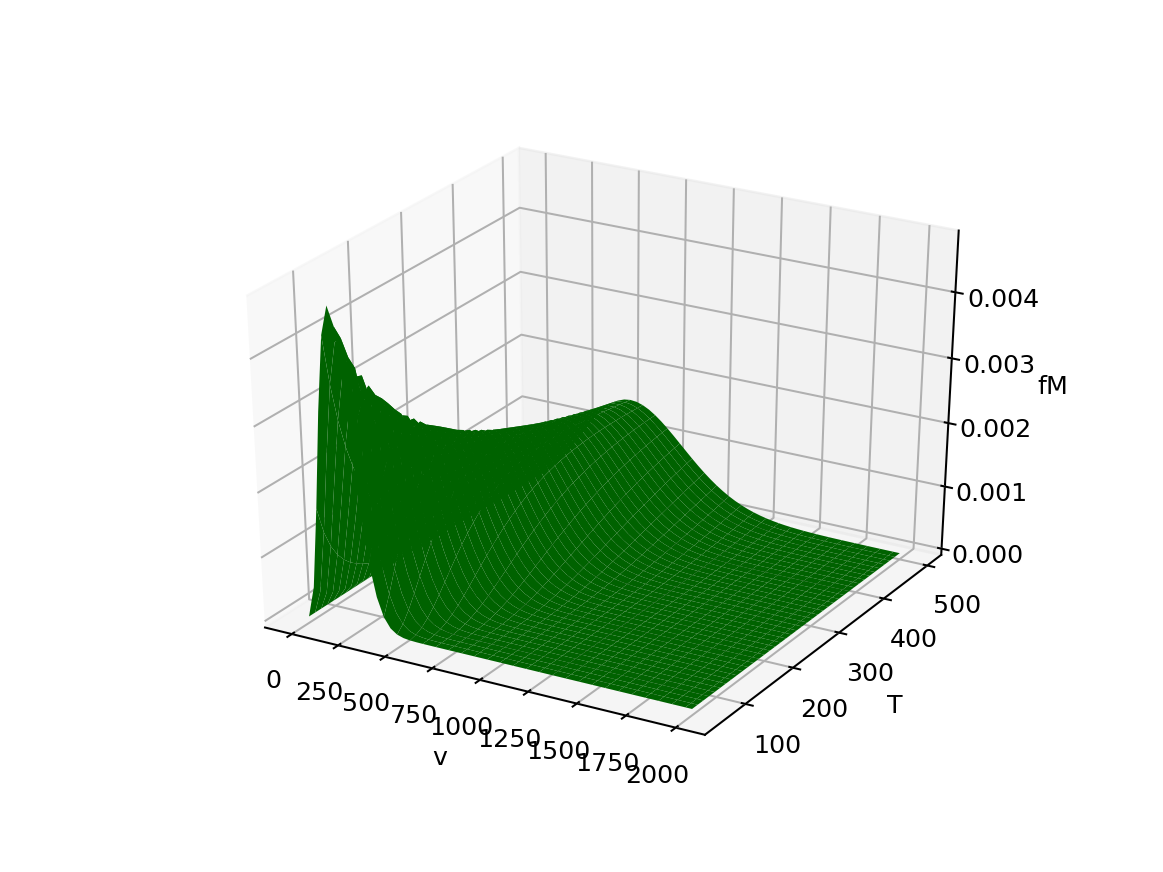

In [11]:
# Calculate D, NM, and fM -- and plot fM


### BEGIN SOLUTION

# Calculate grids of "D" and the normalization constant
DM = M/(2*R*T)
NM = 2**.5*M**(3/2)*R**(-3/2)*T**(-3/2)*np.pi**(-0.5)

# Get the probability density for every point on the grid
fM= NM*v**2*np.exp(-DM*v**2)
print("shape of fM=",np.shape(fM))

# Open up a 3d figure window
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 

# Prepping the axis labels
xlabel = "v"
ylabel = "T"
zlabel = "fM"

# Graph the pressure
ax.plot_surface(v, T, fM, color='green') # Make the mesh plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

Savinghere = False
if Savinghere:
    np.savetxt('.TM.txt',T)
    np.savetxt('.vx.txt',vx)
    np.savetxt('.v.txt',v)
    np.savetxt('.fB.txt',fB)
    np.savetxt('.fM.txt',fM)

Savingthere = False
if Savingthere:
    np.savetxt('../Week_3b.MomentsAndAverages/TM.txt',T)
    np.savetxt('../Week_3b.MomentsAndAverages/vx.txt',vx)
    np.savetxt('../Week_3b.MomentsAndAverages/v.txt',v)
    np.savetxt('../Week_3b.MomentsAndAverages/fB.txt',fB)
    np.savetxt('../Week_3b.MomentsAndAverages/fM.txt',fM)

    
### END SOLUTION

### Pause for Analysis
In your paper notebook, sketch $f_B(T,v_x)$ and $f_M(T,v)$, with axes labeled.

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page